In [1]:
import pandas as pd

In [2]:
datafile="/Users/Ankitude/Downloads/titanicdata.htm"

In [3]:
from bs4 import BeautifulSoup
with open(datafile,"r") as f:
    soup=BeautifulSoup(f,"html.parser")

In [4]:
table=soup.find('table')
data =pd.read_html(str(table),flavor='bs4')[0]

In [5]:
data.head()

,Name,Age,Class/Dept,Ticket,Joined,Job,Boat [Body],Unnamed: 7
0,"ABÄ«-AL-MUNÃ , Mr NÄ�sÄ«f QÄ�sim",27,3rd Class Passenger,2699£18 15s 9d,Cherbourg,NaN,15,NaN
1,"ABBING, Mr Anthony",42,3rd Class Passenger,5547£7 11s,Southampton,Blacksmith,NaN,NaN
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39,3rd Class Passenger,CA2673£20 5s,Southampton,NaN,A,NaN
3,"ABBOTT, Mr Rossmore Edward",16,3rd Class Passenger,CA2673£20 5s,Southampton,Jeweller,[190],NaN
4,"ABBOTT, Mr Eugene Joseph",13,3rd Class Passenger,CA2673£20 5s,Southampton,Scholar,NaN,NaN


In [6]:
def cleanup(value):
    return value.encode('ascii', errors='replace').replace("?"," ")

def cleanup1(value):
    return value.encode('ascii', errors='replace').replace("nan","NULL")

data['Name']=data['Name'].apply(cleanup)
data['Boat [Body]']=data['Boat [Body]'].astype(str)
data['Boat [Body]']=data['Boat [Body]'].apply(cleanup)
data['Boat [Body]']=data['Boat [Body]'].apply(cleanup1)

data['Age']=data['Age'].apply(pd.to_numeric, errors='coerce')
data =data[["Name","Age","Class/Dept","Boat [Body]"]]

In [7]:
data.head()

,Name,Age,Class/Dept,Boat [Body]
0,"AB -AL-MUN , Mr N s f Q sim",27.0,3rd Class Passenger,15
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,NULL
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190]
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,NULL


In [8]:
def checkpass(class_type):
    if "Passenger" in class_type:
        return "Passenger"
    else:
        return "Crew"

In [9]:
data["Crew/Pass"]=data["Class/Dept"].apply(checkpass)
data.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Pass
0,"AB -AL-MUN , Mr N s f Q sim",27.0,3rd Class Passenger,15,Passenger
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,NULL,Passenger
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,NULL,Passenger


In [10]:
def checkclass(class_type):
    if "Passenger" in class_type:
        return class_type.split(" ")[0]
    else:
        return "Crew"
    
data["Class"]=data["Class/Dept"].apply(checkclass)
data.head()
    

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class
0,"AB -AL-MUN , Mr N s f Q sim",27.0,3rd Class Passenger,15,Passenger,3rd
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,NULL,Passenger,3rd
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,NULL,Passenger,3rd


In [11]:
def checkadult(age):
    if age>=18:
        return "Adult"
    else:
        return "Child"
    
data ["Adult/Child"]=data["Age"].apply(checkadult)
data.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child
0,"AB -AL-MUN , Mr N s f Q sim",27.0,3rd Class Passenger,15,Passenger,3rd,Adult
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,NULL,Passenger,3rd,Adult
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd,Adult
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd,Child
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,NULL,Passenger,3rd,Child


In [12]:
def checkGender(name):
    firstname=name[name.index(",")+2:]
    sal=firstname.split(" ")[0]
    if sal in ["Mr","Master"]:
        return "Male"
    else:
        return "Female"
    
   
    

In [13]:
data["Gender"]=data["Name"].apply(checkGender)
data.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child,Gender
0,"AB -AL-MUN , Mr N s f Q sim",27.0,3rd Class Passenger,15,Passenger,3rd,Adult,Male
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,NULL,Passenger,3rd,Adult,Male
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd,Adult,Female
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd,Child,Male
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,NULL,Passenger,3rd,Child,Male


In [14]:
data.tail()


,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child,Gender
2451,"ZAKARIAN, Mr Mapriededer",22.0,3rd Class Passenger,[304],Passenger,3rd,Adult,Male
2452,"ZANETTI, Sig. Minio",20.0,Restaurant Staff,NULL,Crew,Crew,Adult,Female
2453,"ZARRACCHI, Sig. L.",26.0,Restaurant Staff,NULL,Crew,Crew,Adult,Female
2454,"ZENNI, Mr Philip",25.0,3rd Class Passenger,6,Passenger,3rd,Adult,Male
2455,"ZIMMERMANN, Mr Leo",29.0,3rd Class Passenger,NULL,Passenger,3rd,Adult,Male


In [15]:
data.shape

(2456, 8)

In [16]:
def checkSurvival(boat):
    if "NULL" in boat:
        return 0
    if "[" in boat:
        return 0
    else:
        return 1

data ["Survival"]=data["Boat [Body]"].apply(checkSurvival)
data.head()

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child,Gender,Survival
0,"AB -AL-MUN , Mr N s f Q sim",27.0,3rd Class Passenger,15,Passenger,3rd,Adult,Male,1
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,NULL,Passenger,3rd,Adult,Male,0
2,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,A,Passenger,3rd,Adult,Female,1
3,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,[190],Passenger,3rd,Child,Male,0
4,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,NULL,Passenger,3rd,Child,Male,0


In [17]:
data.groupby(['Crew/Pass'])['Survival'].sum()*100/data.groupby(['Crew/Pass'])['Survival'].count()

Crew/Pass
Crew         13.586957
Passenger    35.798817
Name: Survival, dtype: float64

In [18]:
def compare(group,data):
    return data.groupby([group])['Survival'].sum()*100/data.groupby([group])['Survival'].count()

compare ("Class",data)


Class
1st     57.428571
2nd     37.883959
3rd     24.259520
Crew    13.586957
Name: Survival, dtype: float64

In [19]:
data.tail()

,Name,Age,Class/Dept,Boat [Body],Crew/Pass,Class,Adult/Child,Gender,Survival
2451,"ZAKARIAN, Mr Mapriededer",22.0,3rd Class Passenger,[304],Passenger,3rd,Adult,Male,0
2452,"ZANETTI, Sig. Minio",20.0,Restaurant Staff,NULL,Crew,Crew,Adult,Female,0
2453,"ZARRACCHI, Sig. L.",26.0,Restaurant Staff,NULL,Crew,Crew,Adult,Female,0
2454,"ZENNI, Mr Philip",25.0,3rd Class Passenger,6,Passenger,3rd,Adult,Male,1
2455,"ZIMMERMANN, Mr Leo",29.0,3rd Class Passenger,NULL,Passenger,3rd,Adult,Male,0


In [20]:
compare("Gender",data)

Gender
Female    59.272097
Male      15.540181
Name: Survival, dtype: float64

In [21]:
compare("Adult/Child",data)

Adult/Child
Adult    25.078370
Child    33.183857
Name: Survival, dtype: float64

In [22]:
train=data[["Age","Crew/Pass","Class","Adult/Child","Gender","Survival"]]
train.head()

,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
0,27.0,Passenger,3rd,Adult,Male,1
1,42.0,Passenger,3rd,Adult,Male,0
2,39.0,Passenger,3rd,Adult,Female,1
3,16.0,Passenger,3rd,Child,Male,0
4,13.0,Passenger,3rd,Child,Male,0


In [23]:
def catToNum(series):
    series=series.astype('category')
    return series.cat.codes

catdata=train[["Crew/Pass","Class","Adult/Child","Gender"]].apply(catToNum)
train[["Crew/Pass","Class","Adult/Child","Gender"]]=catdata
train.head()

C:\Anaconda2\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
0,27.0,1,2,0,1,1
1,42.0,1,2,0,1,0
2,39.0,1,2,0,0,1
3,16.0,1,2,1,1,0
4,13.0,1,2,1,1,0


In [24]:
len(train)

2456

In [25]:
train=train.dropna()
len(train)

2426

In [26]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(train,test_size=0.2)

In [27]:
train.head()

,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
1408,35.0,0,3,0,1,0
120,46.0,0,3,0,1,0
929,48.0,1,0,0,1,1
1700,29.0,1,0,0,1,1
319,34.0,0,3,0,1,0


In [28]:
test.head()

,Age,Crew/Pass,Class,Adult/Child,Gender,Survival
1591,17.0,1,1,1,1,0
1176,22.0,1,1,0,0,0
1170,34.0,1,1,0,1,0
1770,31.0,0,3,0,1,0
2183,14.0,1,1,1,1,0


In [29]:
len(train)

1940

In [30]:
len(test)

486

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_leaf_nodes=30)
clf=clf.fit(train[["Age","Crew/Pass","Class","Adult/Child","Gender"]],train["Survival"])

In [32]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
clf.feature_importances_

array([ 0.16634532,  0.02670511,  0.25553638,  0.        ,  0.55141318])

In [34]:
from sklearn import tree
with open("titanic.dot","w") as f:
    f=tree.export_graphviz(clf,feature_names=["Age","Crew/Pass","Class","Adult/Child","Gender"],out_file=f)

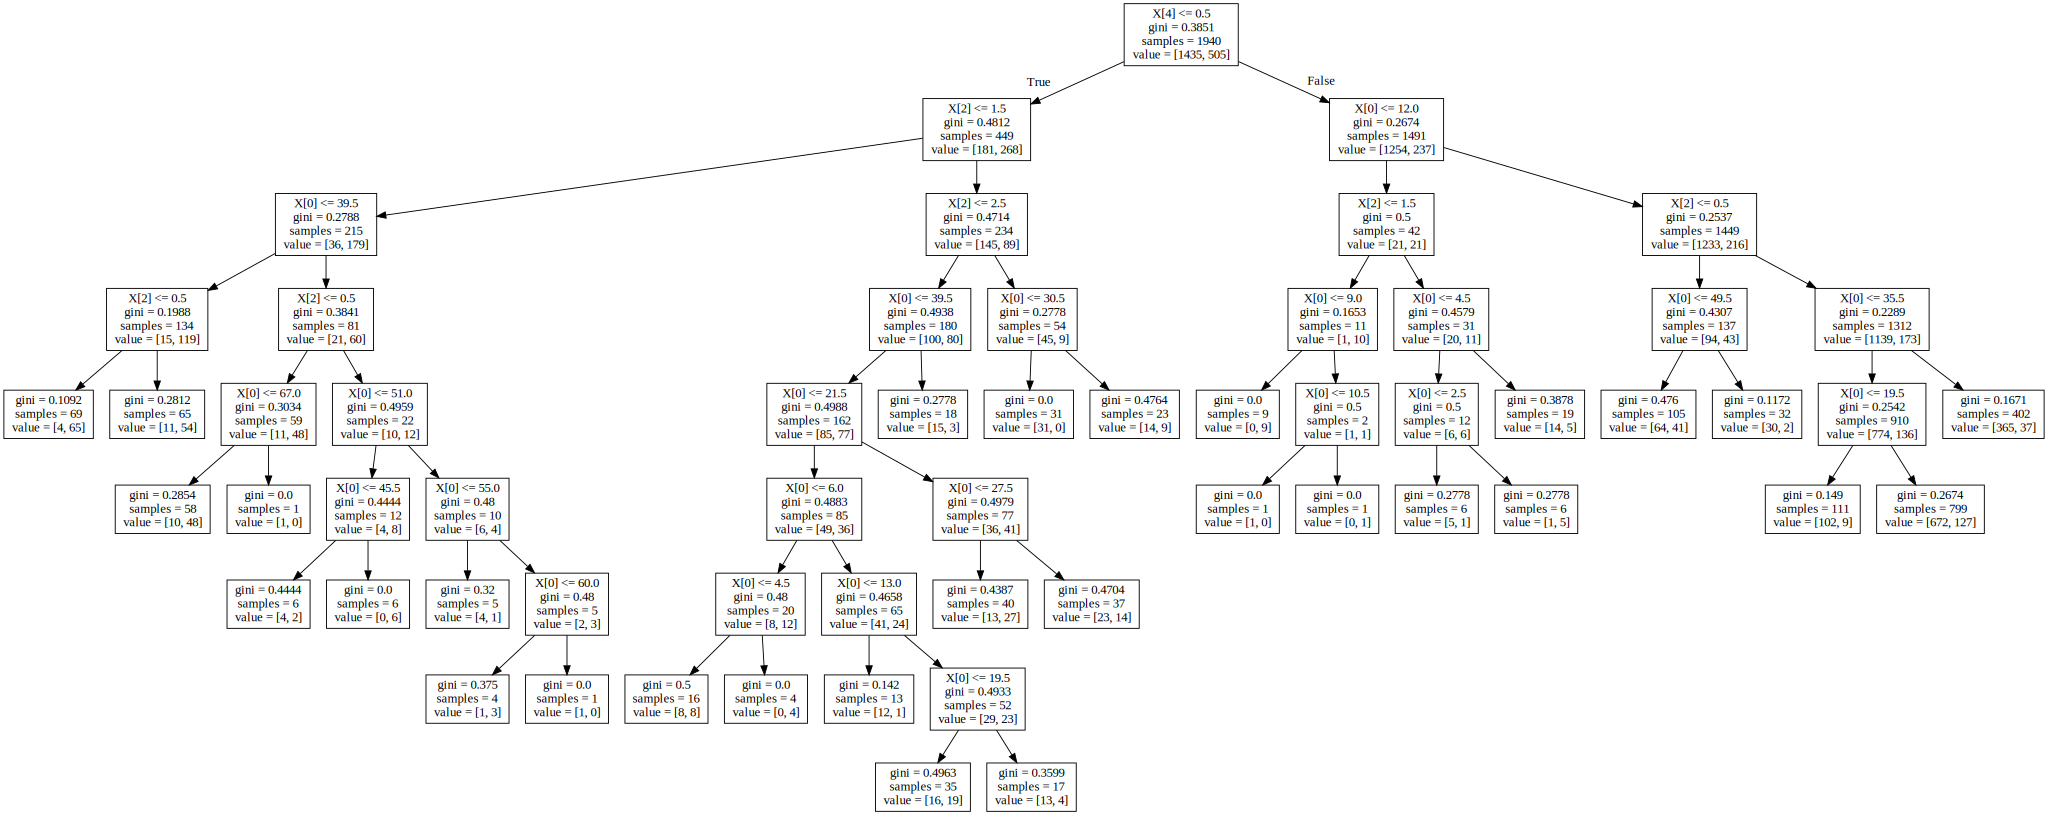

In [43]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf,out_file="titanic.dot")
with open("titanic.dot") as f:
    dot=f.read()
graphviz.Source(dot)
